# Prediction of car prices

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd

In [3]:
# Reading and understanding the dataset.

cars = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# First five rows.

cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Getting clarity of the data

In [5]:
#Checking its shape i.e rows and columns.

cars.shape

(205, 26)

In [6]:
# Info of the data.

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# Statistical Analysis of data.

cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Extracting brand from car name.

cars["brand name"] = cars['CarName'].str.split().str[0]

In [9]:
cars.loc[:,'brand name']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

In [10]:
# Correcting the brand names

cars['brand name'].replace(regex={r'alfa.*o':'alfa-romeo', r'v.*w.*':'volkswagen', r'to.*ta':'toyota', r'm.*da':'mazda', r'po.*hce':'porsche', 'Nissan':'nissan'}, inplace=True)
cars.loc[:,'brand name']

0      alfa-romeo
1      alfa-romeo
2      alfa-romeo
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
          ...    
175        toyota
176        toyota
177        toyota
178        toyota
179        toyota
180        toyota
181        toyota
182    volkswagen
183    volkswagen
184    volkswagen
185    volkswagen
186    volkswagen
187    volkswagen
188    volkswagen
189    volkswagen
190    volkswagen
191    volkswagen
192    volkswagen
193    volkswagen
194         volvo
195         volvo
196         volvo
197         volvo
198         volvo
199       

In [11]:
# Checking the data.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [12]:
# Columns

cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'brand name'],
      dtype='object')

In [13]:
# Drop  un-necessary rows.

cars.drop(['car_ID','CarName'], axis=1, inplace=True)

In [14]:
# Left Columns.

cars.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'brand name'],
      dtype='object')

In [15]:
# Renaming one attribute - curbweight to carweight

cars.rename(index=str, columns={'curbweight': 'carweight'}, inplace=True)

# Visualizing the data.

In [16]:
# Import needed libraries.

import matplotlib.pyplot as plt
import seaborn as sns

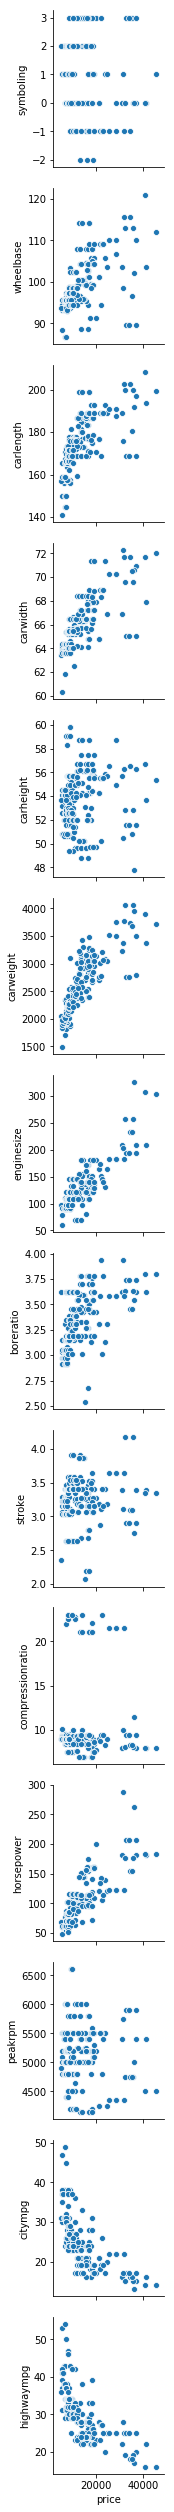

In [17]:
# pairplots

sns.pairplot(cars, x_vars='price', y_vars=["symboling", "wheelbase", 'carlength', 'carwidth', 'carheight', 'carweight',
                                           'enginesize','boreratio', 'stroke', 
                                           'compressionratio','horsepower', 'peakrpm','citympg','highwaympg'])
plt.show()

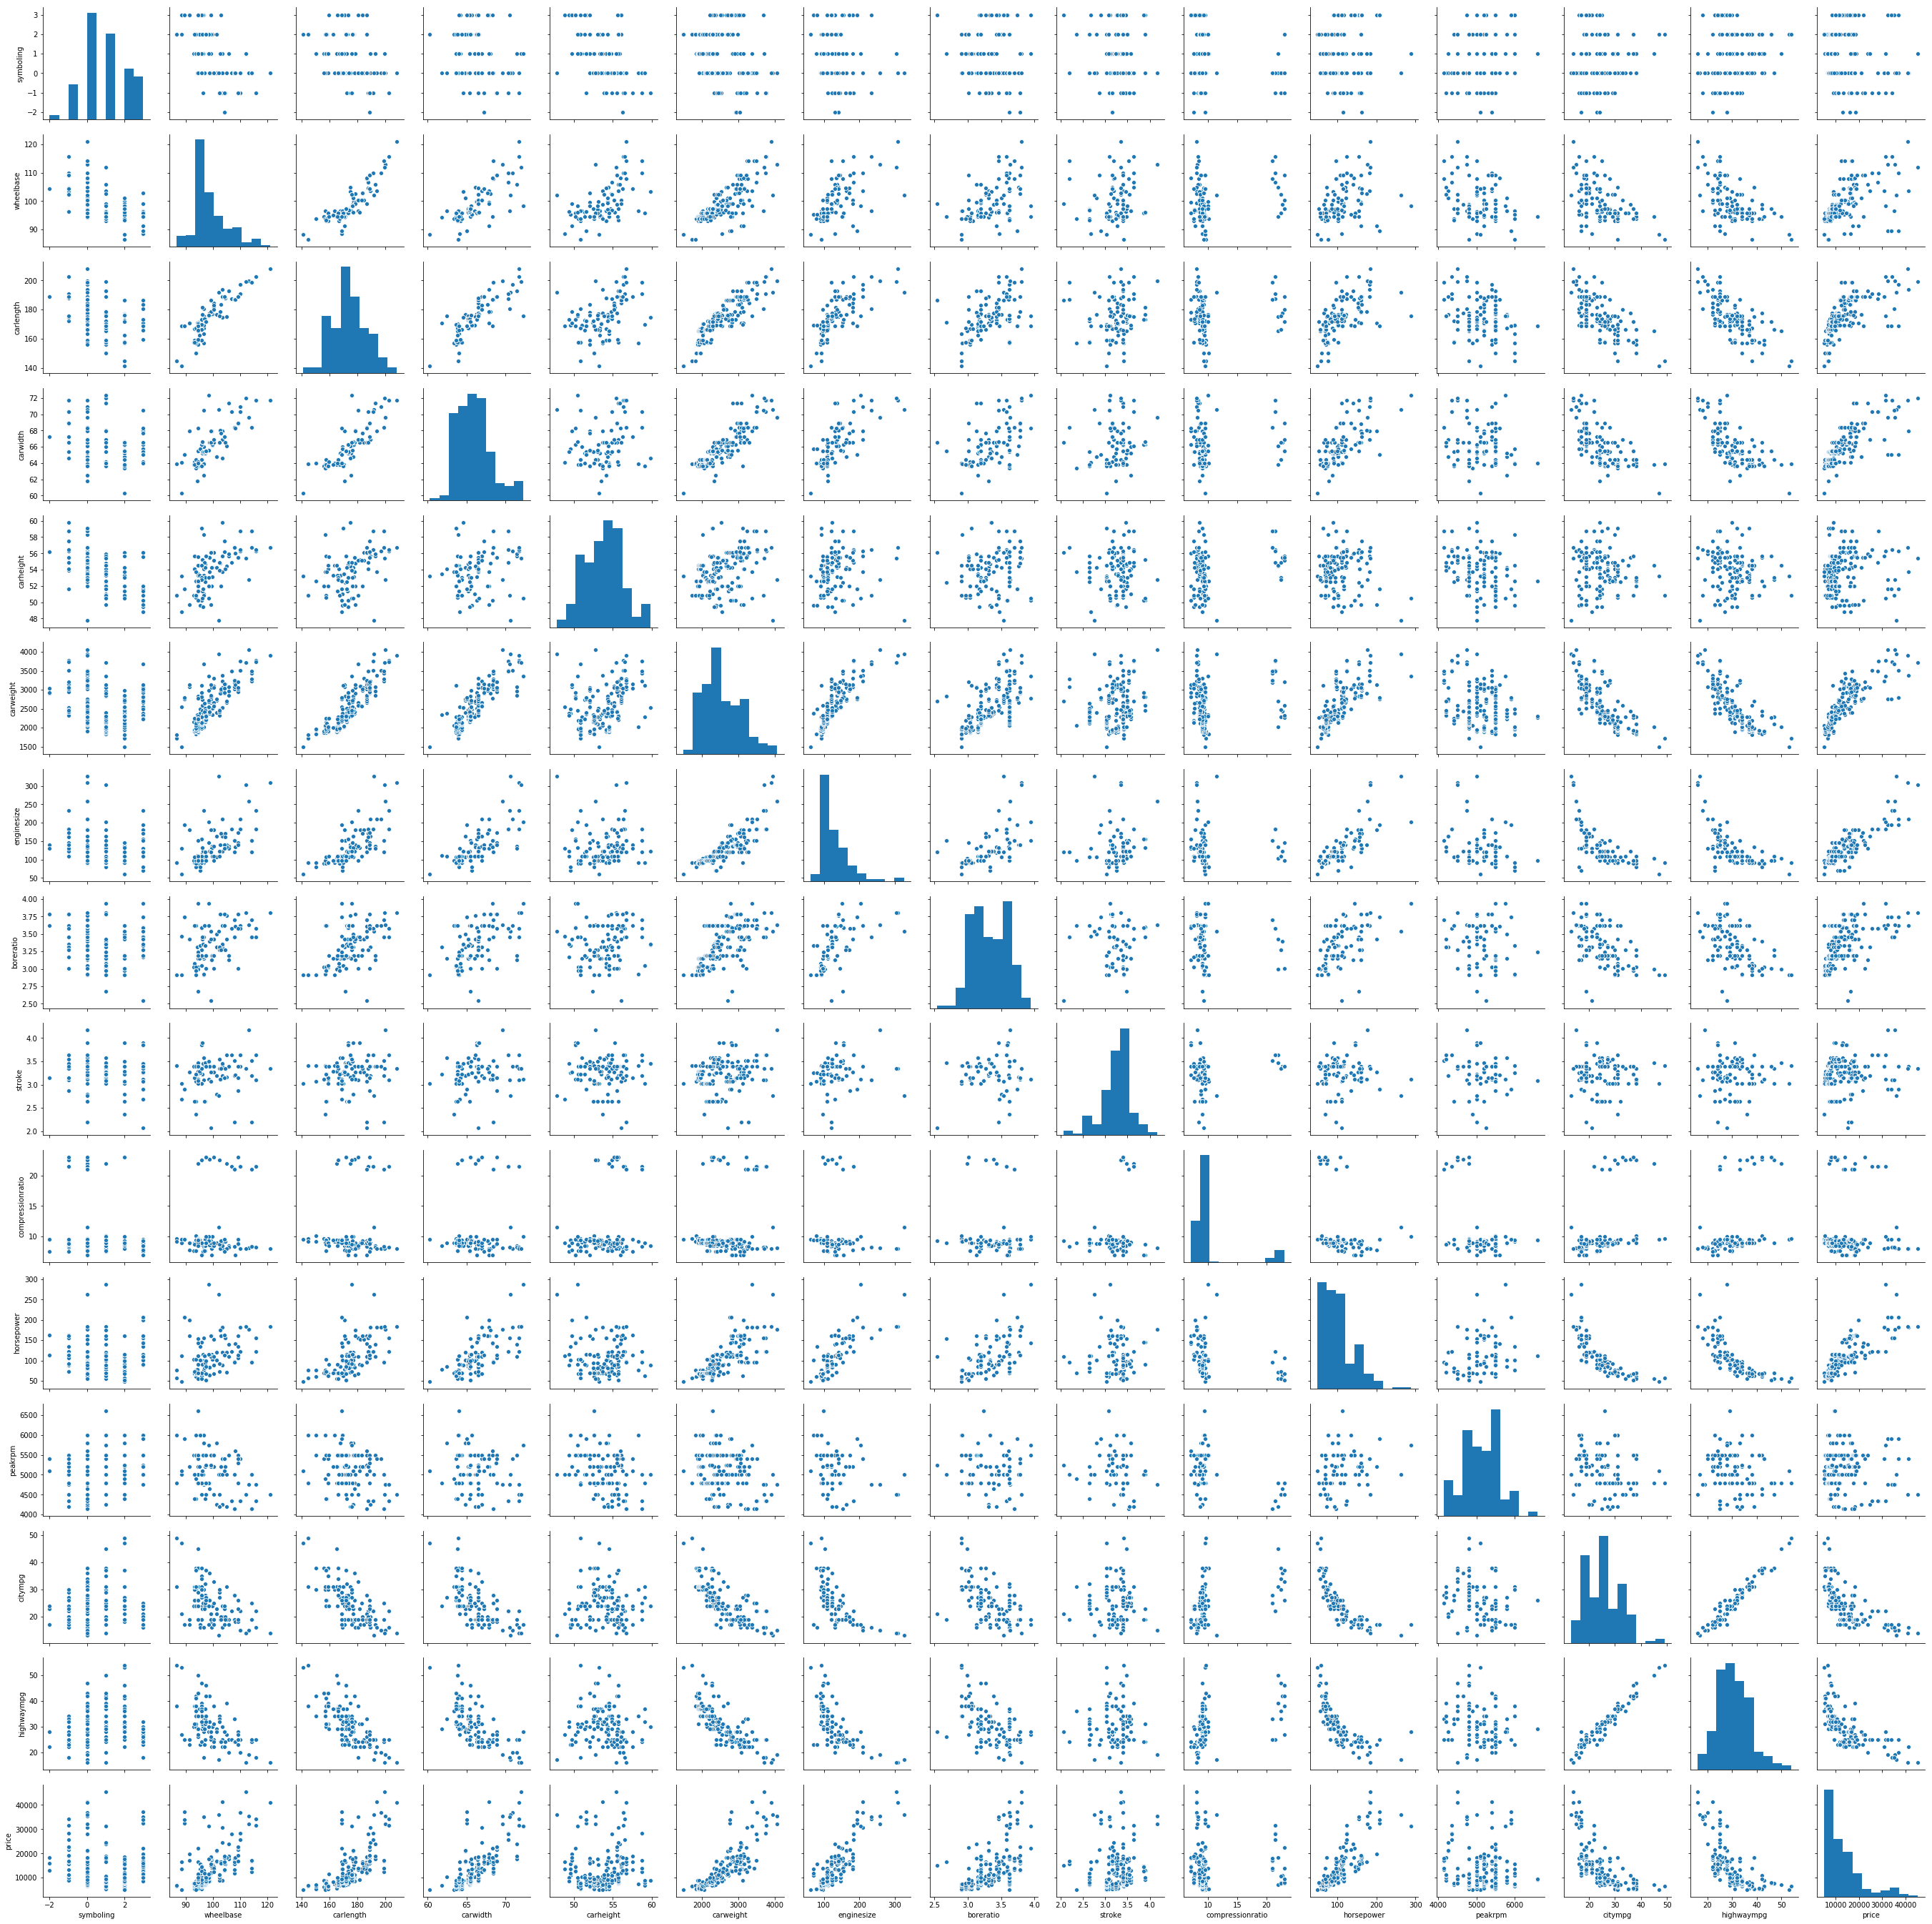

<Figure size 3600x2880 with 0 Axes>

In [18]:
# Scatter-plots for all numerical variables.

sns.pairplot(cars)
plt.figure(figsize=(50,40))
plt.show()

#### Car weight, Engine size, horse power has some strong relation with price.

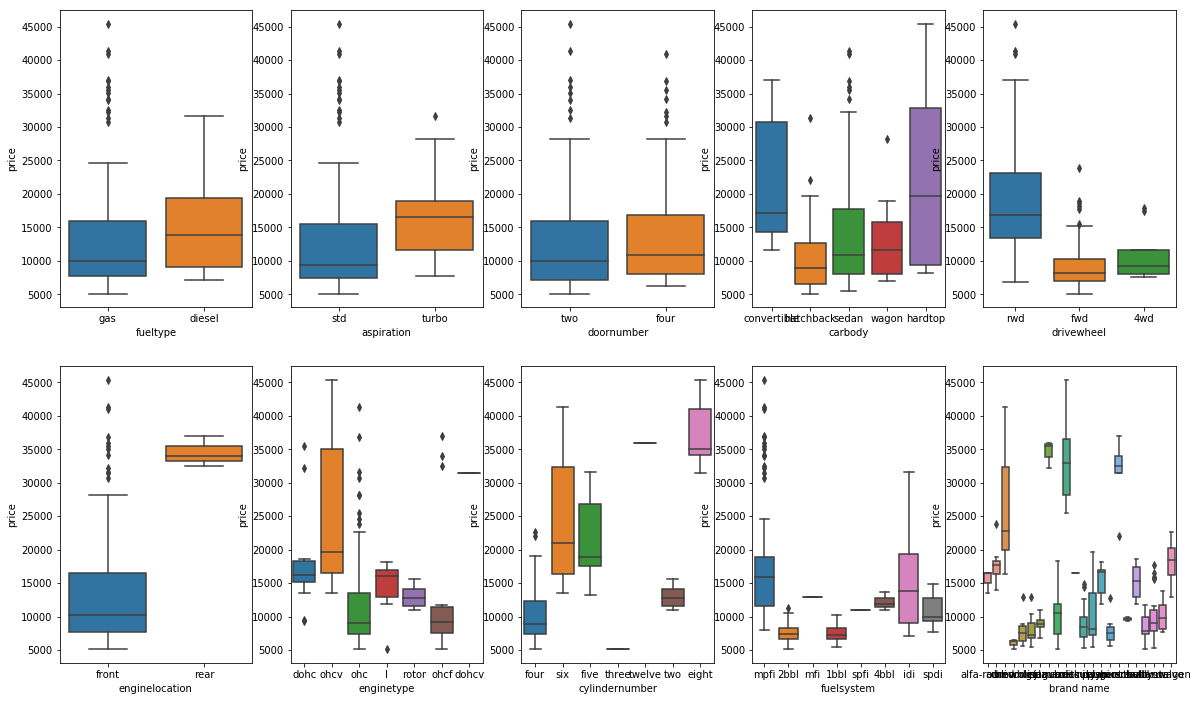

In [19]:
# Visualising the categorical variables.

plt.figure(figsize=(20, 12))
plt.subplot(2,5,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(2,5,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,5,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(2,5,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(2,5,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(2,5,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(2,5,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(2,5,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(2,5,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.subplot(2,5,10)
sns.boxplot(x = 'brand name', y = 'price', data = cars)
plt.show()

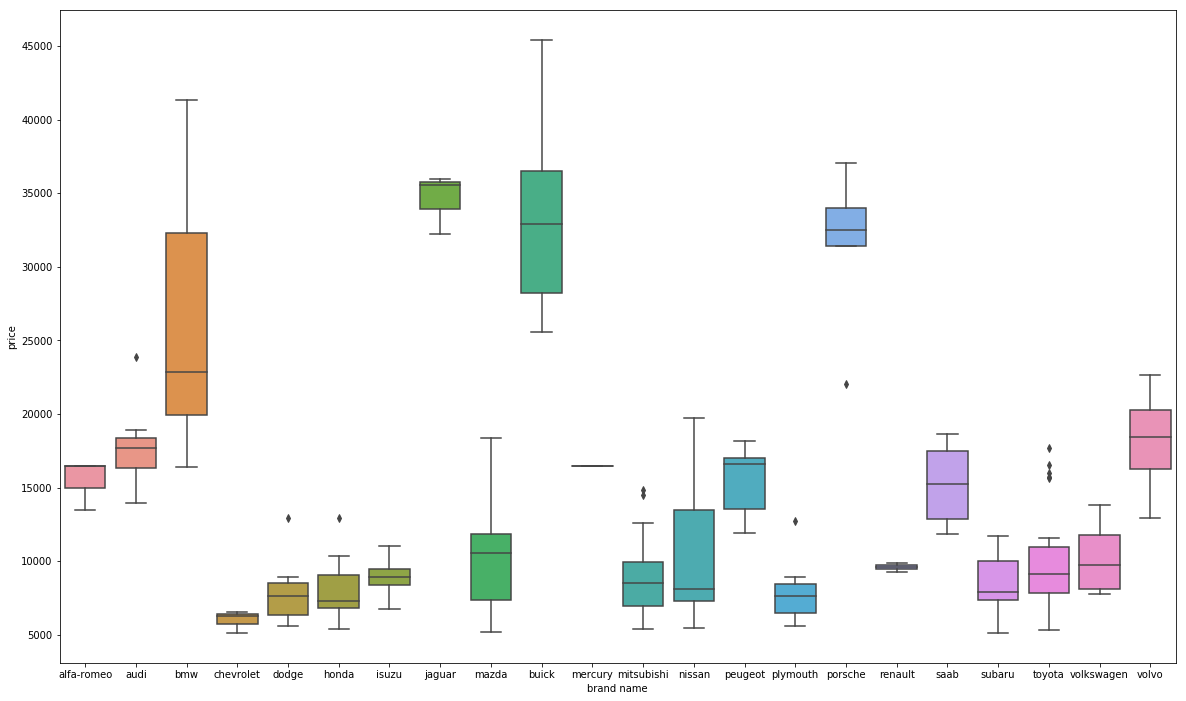

In [20]:
# Brand-name for clarity.

plt.figure(figsize=(20, 12))
sns.boxplot(x = 'brand name', y = 'price', data = cars)
plt.show()

#### Apart from fueltype, door number; most of categorical variables are related somehow.

In [21]:
# Creating a list of all categorical variables.

C_V = cars[['fueltype','aspiration','doornumber','carbody',
             'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','brand name']]

In [22]:
C_V.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand name
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romeo
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [23]:
# Dataframe for dummies.

X = pd.get_dummies(data=C_V, drop_first=True)

In [24]:
# Dummy Variables

X.columns

Index(['fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand name_audi',
       'brand name_bmw', 'brand name_buick', 'brand name_chevrolet',
       'brand name_dodge', 'brand name_honda', 'brand name_isuzu',
       'brand name_jaguar', 'brand name_mazda', 'brand name_mercury',
       'brand name_mitsubishi', 'brand name_nissan', 'brand name_peugeot',
       'brand name_plymouth', 'brand name_porsche', 'brand name_rena

In [25]:
# Dropping the categorical variables used for dummies as of no use now. 

cars.drop(C_V, axis=1, inplace=True)

In [26]:
# Shape of cars DF

cars.shape

(205, 15)

In [27]:
# Merging the cars and created dummies DF's.

cars = pd.concat([cars, X], axis=1)

In [28]:
# Now shape

cars.shape

(205, 65)

In [29]:
# Columns left with.

cars.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'carweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand name_audi',
       'brand name_bmw', 'brand name_buick', 'brand name_chevrolet',
       'brand name_dodge', 'brand name_honda', 'brand name_isuzu',

In [30]:
# Importing libraries

from sklearn.model_selection import train_test_split

In [31]:
# Train-Test Split.

df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
# Scaling the numerical variables excluding the dummies created.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Numerical Variables need to be scaled.

N_V = ["symboling", "wheelbase", 'carlength', 'carwidth', 'carheight', 'carweight',
                                           'enginesize','boreratio', 'stroke', 'price',
                                           'compressionratio','horsepower', 'peakrpm','citympg','highwaympg']

In [34]:
# Scaling the train set and learning for scaling the test set.

df_train[N_V] = scaler.fit_transform(df_train[N_V])
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,carweight,enginesize,boreratio,stroke,compressionratio,...,brand name_nissan,brand name_peugeot,brand name_plymouth,brand name_porsche,brand name_renault,brand name_saab,brand name_subaru,brand name_toyota,brand name_volkswagen,brand name_volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


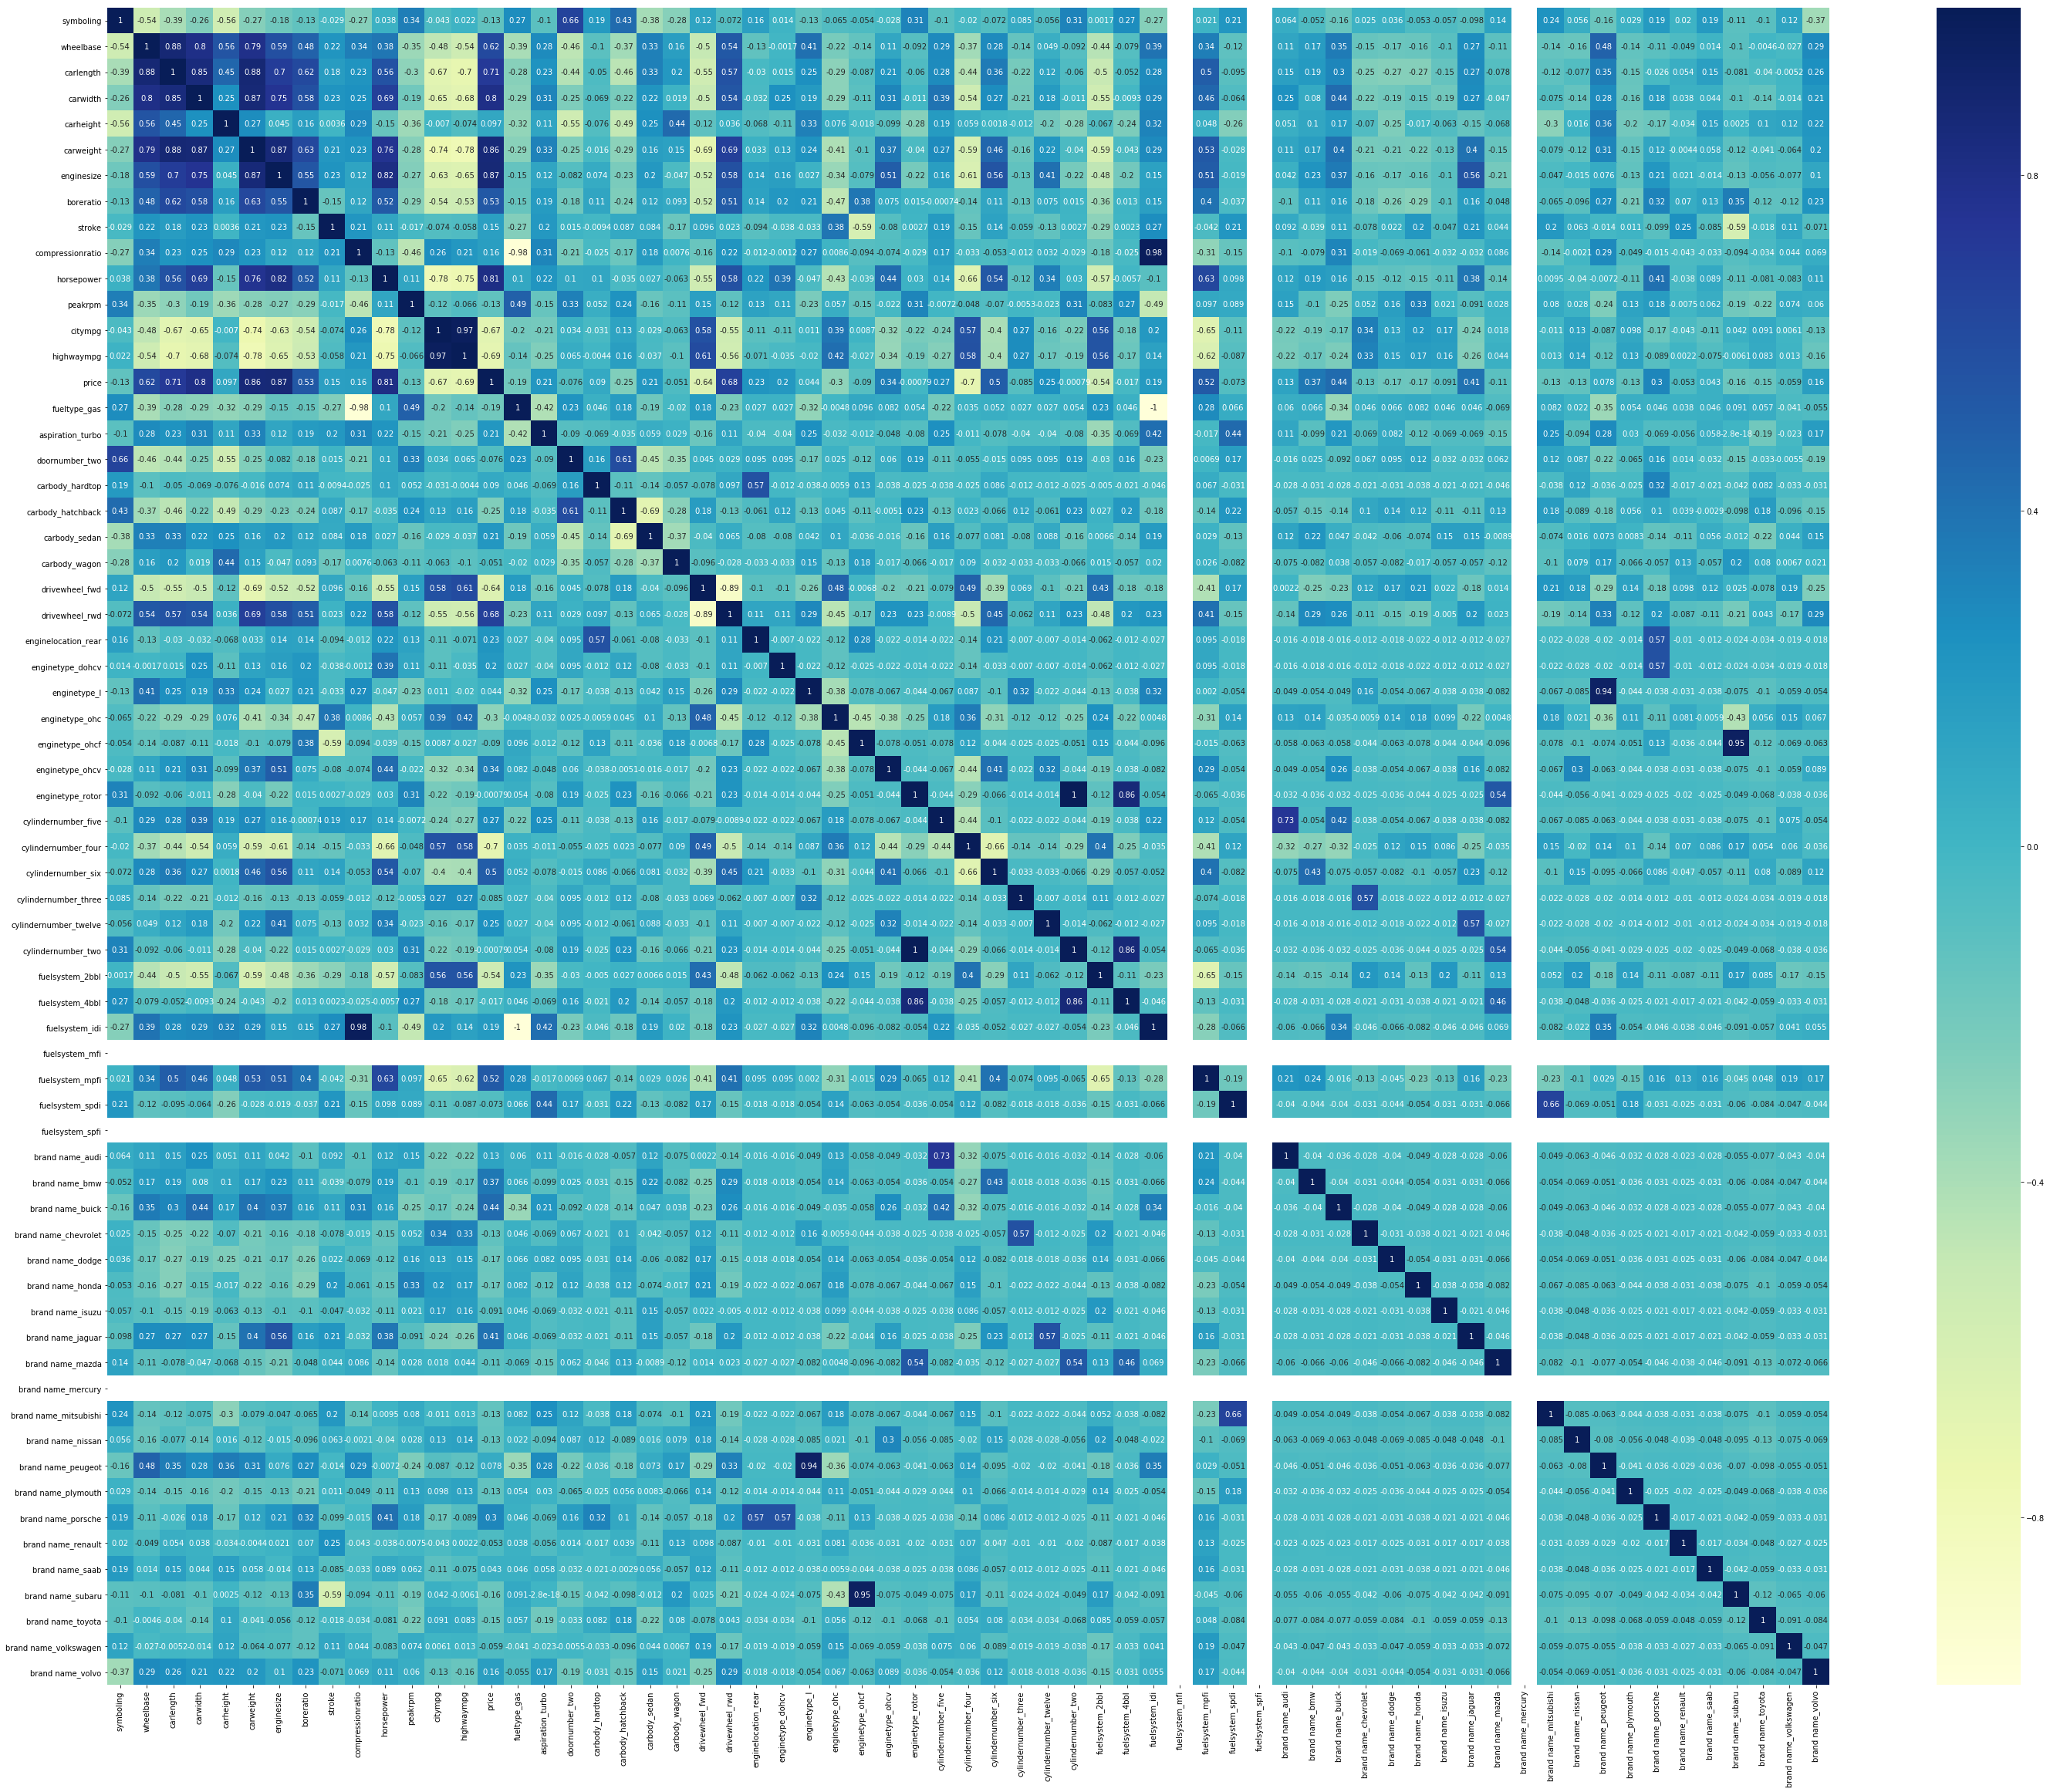

In [35]:
# Correlation matrix, can be zommed upon clicking.

plt.figure(figsize = (50, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### This gives fair idea of variables which are strongly related with price. But we can't start with the one strongly related predictor, because of 65 columns. So, creating model with all predictors and using RFE to reach the optimal model.

In [36]:
# Splitting X and Y train.

Y_train = df_train.pop('price')
X_train = df_train

In [37]:
# Importing libraries required.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Linear regression Instance

lm = LinearRegression()

In [39]:
print(Y_train.shape)

(143,)


In [40]:
# Creating model with all predictors.

lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Using RFE to limit the top 15 predictors..

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, Y_train)

In [42]:
# RFE selected predictors.

list(zip(X_train.columns[rfe.support_], rfe.support_, rfe.ranking_))

[('carwidth', False, 45),
 ('carweight', False, 10),
 ('enginesize', False, 15),
 ('boreratio', True, 1),
 ('stroke', False, 12),
 ('enginelocation_rear', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', False, 23),
 ('cylindernumber_three', False, 5),
 ('cylindernumber_twelve', False, 7),
 ('cylindernumber_two', False, 33),
 ('brand name_bmw', False, 17),
 ('brand name_porsche', False, 26)]

In [43]:
# Columns selected using RFE

col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'carweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'brand name_bmw',
       'brand name_porsche'],
      dtype='object')

In [44]:
# Not selected

X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'brand name_audi', 'brand name_buick', 'brand name_chevrolet',
       'brand name_dodge', 'brand name_honda', 'brand name_isuzu',
       'brand name_jaguar', 'brand name_mazda', 'brand name_mercury',
       'brand name_mitsubishi', 'brand name_nissan', 'brand name_peugeot',
       'brand name_plymouth', 'brand name_renault', 'brand name_saab',
       'brand name_subaru', 'brand name_toyota', 'brand name_volkswagen',
     

In [45]:
# Taking the 15 suggested predictors for next model..

X_train_rfe = X_train[col]

In [46]:
# Using statsmodel for some stats part.

import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
#  New Model using 15 predictors

lm = sm.OLS(Y_train, X_train_rfe).fit()

In [48]:
# Statistical Summary..

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.71e-67
Time:                        22:04:32   Log-Likelihood:                 208.60
No. Observations:                 143   AIC:                            -387.2
Df Residuals:                     128   BIC:                            -342.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [49]:
# Checking the VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype_rotor,inf
12,cylindernumber_two,inf
2,enginesize,70.990000
1,carweight,47.650000
0,carwidth,40.910000
3,boreratio,40.420000
4,stroke,34.010000
9,cylindernumber_four,24.200000
11,cylindernumber_twelve,2.760000
8,cylindernumber_five,2.530000


In [50]:
# Dropping the variable with 'inf' VIF value.

X_train_new = X_train_rfe.drop('enginetype_rotor', axis=1)

In [51]:
X_train_new.columns

Index(['const', 'carwidth', 'carweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_ohcf', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'brand name_bmw', 'brand name_porsche'],
      dtype='object')

In [52]:
# Re-creating the model.

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train, X_train_new).fit()

In [53]:
# Summary..

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.71e-67
Time:                        22:04:54   Log-Likelihood:                 208.60
No. Observations:                 143   AIC:                            -387.2
Df Residuals:                     128   BIC:                            -342.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [54]:
# VIF values

vif = pd.DataFrame()
X = X_train_new.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,70.99
1,carweight,47.65
0,carwidth,40.91
3,boreratio,40.42
4,stroke,34.01
8,cylindernumber_four,24.20
11,cylindernumber_two,3.74
10,cylindernumber_twelve,2.76
7,cylindernumber_five,2.53
6,enginetype_ohcf,2.29


In [55]:
# Dropping predictor with high vif..

X_train1 = X_train_new.drop('enginesize', axis=1)

In [56]:
# New Model

X_train1 = sm.add_constant(X_train1)
lm = sm.OLS(Y_train, X_train1).fit()

In [57]:
# Summary..

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     85.27
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.04e-56
Time:                        22:05:17   Log-Likelihood:                 178.61
No. Observations:                 143   AIC:                            -329.2
Df Residuals:                     129   BIC:                            -287.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [58]:
# Dropping insignificant variable i.e with hihg p-value.

X_train2 = X_train1.drop('boreratio', axis=1)

In [59]:
# New Model

X_train2 = sm.add_constant(X_train2)
lm = sm.OLS(Y_train, X_train2).fit()

In [60]:
# Summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     93.08
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.05e-57
Time:                        22:05:26   Log-Likelihood:                 178.61
No. Observations:                 143   AIC:                            -331.2
Df Residuals:                     130   BIC:                            -292.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [61]:
# Drpo stroke, high p-value

X_train3 = X_train2.drop('stroke', axis=1)

In [62]:
# New Model

X_train3 = sm.add_constant(X_train3)
lm = sm.OLS(Y_train, X_train3).fit()

In [63]:
# Summary..

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     102.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.03e-58
Time:                        22:05:39   Log-Likelihood:                 178.59
No. Observations:                 143   AIC:                            -333.2
Df Residuals:                     131   BIC:                            -297.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [64]:
# Dropping predictor with high p-value

X_train4 = X_train3.drop('cylindernumber_five', axis=1)

In [65]:
# New Model

X_train4 = sm.add_constant(X_train4)
lm = sm.OLS(Y_train, X_train4).fit()

In [66]:
# Summary..

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.02e-59
Time:                        22:05:52   Log-Likelihood:                 178.50
No. Observations:                 143   AIC:                            -335.0
Df Residuals:                     132   BIC:                            -302.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [67]:
# Drop predictor with high p-value

X_train5 = X_train4.drop('cylindernumber_two', axis=1)

In [68]:
#  model

X_train5 = sm.add_constant(X_train5)
lm = sm.OLS(Y_train, X_train5).fit()

In [69]:
# Summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.64e-61
Time:                        22:06:07   Log-Likelihood:                 178.40
No. Observations:                 143   AIC:                            -336.8
Df Residuals:                     133   BIC:                            -307.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [70]:
# Dropping variable

X_train6 = X_train5.drop('cylindernumber_three', axis=1)

In [71]:
# New model creation

X_train6 = sm.add_constant(X_train6)
lm = sm.OLS(Y_train, X_train6).fit()

In [72]:
# Summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.26e-61
Time:                        22:09:12   Log-Likelihood:                 177.89
No. Observations:                 143   AIC:                            -337.8
Df Residuals:                     134   BIC:                            -311.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [73]:
# Drop insignificant predictor

X_train7 = X_train6.drop('enginetype_ohcf', axis=1)

In [74]:
# Creating model

X_train7 = sm.add_constant(X_train7)
lm = sm.OLS(Y_train, X_train7).fit()

In [75]:
# Summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.80e-62
Time:                        22:09:20   Log-Likelihood:                 177.20
No. Observations:                 143   AIC:                            -338.4
Df Residuals:                     135   BIC:                            -314.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

#### Since, all the predictors are now significant. So, let's check vif now if there is any multi-collinearity.

In [76]:
# Checking vif's

vif = pd.DataFrame()
X = X_train7.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
0,carwidth,27.71
1,carweight,23.61
3,cylindernumber_four,2.30
6,brand name_porsche,1.65
2,enginelocation_rear,1.57
5,brand name_bmw,1.11
4,cylindernumber_twelve,1.06


In [77]:
# Dropping predictor with high vif..

X_train8 = X_train7.drop('carwidth', axis=1)

In [78]:
# new model..

X_train8 = sm.add_constant(X_train8)
lm = sm.OLS(Y_train, X_train8).fit()

In [79]:
# Summary.

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.12e-60
Time:                        22:09:32   Log-Likelihood:                 169.36
No. Observations:                 143   AIC:                            -324.7
Df Residuals:                     136   BIC:                            -304.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.01

In [80]:
# Check VIF's..

vif = pd.DataFrame()
X = X_train8.drop('const', axis=1)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carweight,1.99
2,cylindernumber_four,1.75
5,brand name_porsche,1.55
1,enginelocation_rear,1.50
4,brand name_bmw,1.11
3,cylindernumber_twelve,1.06


#### Now, all the variables seems significant and vif's are also good. So, we are good with this model.

# Residual Analysis

In [81]:
# Predicting the prices for train set.

Y_train_pred = lm.predict(X_train8)

Text(0.5,0,'Errors')

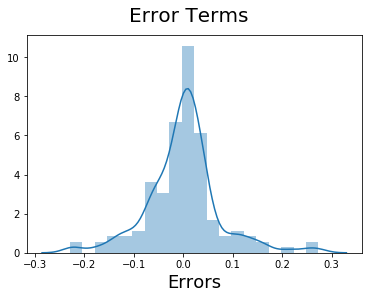

In [82]:
# Plot the histogram of the error terms..

fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Error terms are normally distributed.

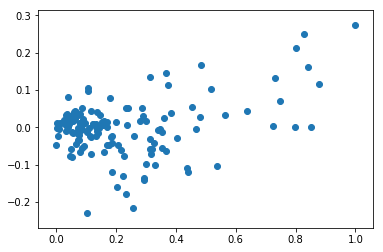

In [83]:
# Error terms are randomly distributed..

plt.scatter(Y_train,(Y_train - Y_train_pred))
plt.show()

# Making Predictions

In [84]:
# Scaling the test set, scaling learnt from train set..

df_test[N_V] = scaler.transform(df_test[N_V])

In [85]:
# Diving the test set into independent and dependent variables..

Y_test = df_test.pop('price')
X_test = df_test

In [87]:
Y_test.head()

160    0.072382
186    0.093295
59     0.102964
165    0.115479
140    0.068652
Name: price, dtype: float64

In [88]:
# Dropping const to select predictors for X_test

X = X_train8.drop('const', axis=1)

In [89]:
# Selecting columns for x test

X_test_new = X_test[X.columns]

In [90]:
# adding constant

X_test_new = sm.add_constant(X_test_new)

In [91]:
# Predicting prices for test set..

Y_test_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0,0.5,'y_pred')

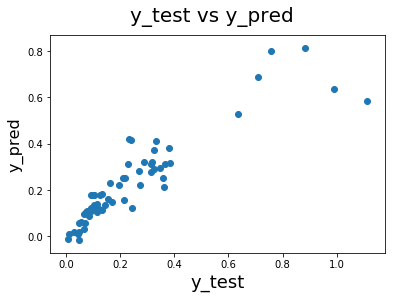

In [92]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(Y_test, Y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [93]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test, Y_test_pred)
print(r_squared)

0.8124388677204286


Text(0,0.5,'Views')

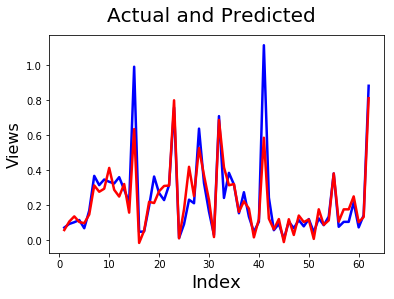

In [94]:
#Actual vs Predicted for test set to see how well our model has performed..

c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

### This shows that our model is performing pretty well on unseen test data with R_squared 0f .812.

### So, the predictors affecting the car prices in US market are :
#### carweight
#### cylindernumber_four (affecting negatively), cylindernumber_twelve
#### enginelocation_rear 
#### brand names - porsche and bmw.